# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [16]:
from IPython.display import Image, display
display(Image(url="https://i.imgur.com/49FNOHj.jpg"))


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [27]:
import pandas as pd

df = pd.read_csv("data/colors.csv")
print(df.head())

# Count unique values in 'name' column
unique_colors = df["name"].nunique()

print(f"Total unique colors: {unique_colors}")

       id                          name     rgb is_trans
0      -1                       Unknown  0033B2        f
1       0                         Black  05131D        f
2       1                          Blue  0055BF        f
3       2                         Green  237841        f
4       3                Dark Turquoise  008F9B        f
..    ...                           ...     ...      ...
130  1004  Trans Flame Yellowish Orange  FCB76D        t
131  1005             Trans Fire Yellow  FBE890        t
132  1006        Trans Light Royal Blue  B4D4F7        t
133  1007                 Reddish Lilac  8E5597        f
134  9999                    [No Color]  05131D        f

[135 rows x 4 columns]
Total unique colors: 135


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [28]:
df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [30]:
from IPython.display import Image, display
display(Image(url="https://i.imgur.com/aKcwkSx.png"))
display(Image(url="https://i.imgur.com/whB1olq.png"))


In [37]:
import pandas as pd

df = pd.read_csv("data/sets.csv")

print(df.head())
print(df.tail())


  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12
           set_num                                 name  year  theme_id  \
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413  


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [54]:
first_lego = df.sort_values('year', ascending=True)
print(first_lego)

       set_num                               name  year  theme_id  num_parts
9545   700.B-1  Small Doors and Windows Set (ABB)  1949       371         12
9521   700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9539   700.3-1              Medium Gift Set (ABB)  1949       365        142
9544   700.A-1              Small Brick Set (ABB)  1949       371         24
9534   700.2-1               Large Gift Set (ABB)  1949       365        178
...        ...                                ...   ...       ...        ...
5399   41919-1                     Power Bracelet  2020       688         33
8217   60265-1             Ocean Exploration Base  2020        52        495
11334  75546-1               Minions in Gru’s Lab  2021       689          0
11337  75550-1             Minions Kung Fu Battle  2021       689          0
11335  75547-1           Minion Pilot in Training  2021       689          0

[15710 rows x 5 columns]


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [58]:
first_year = first_lego["year"].min()
first_lego = first_lego[first_lego["year"] == first_year]

# Display the first LEGO sets
print(f"First LEGO sets were released in {first_year}.\n")
print(first_lego)

First LEGO sets were released in 1949.

      set_num                               name  year  theme_id  num_parts
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9534  700.2-1               Large Gift Set (ABB)  1949       365        178


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [63]:
top_lego = first_lego.sort_values('num_parts', ascending=False)
print(top_lego.head())

      set_num                               name  year  theme_id  num_parts
9534  700.2-1               Large Gift Set (ABB)  1949       365        178
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [70]:
group_counts = df.groupby('year').count()
print(group_counts['set_num'].head())
print(group_counts['set_num'].tail())


year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64
year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

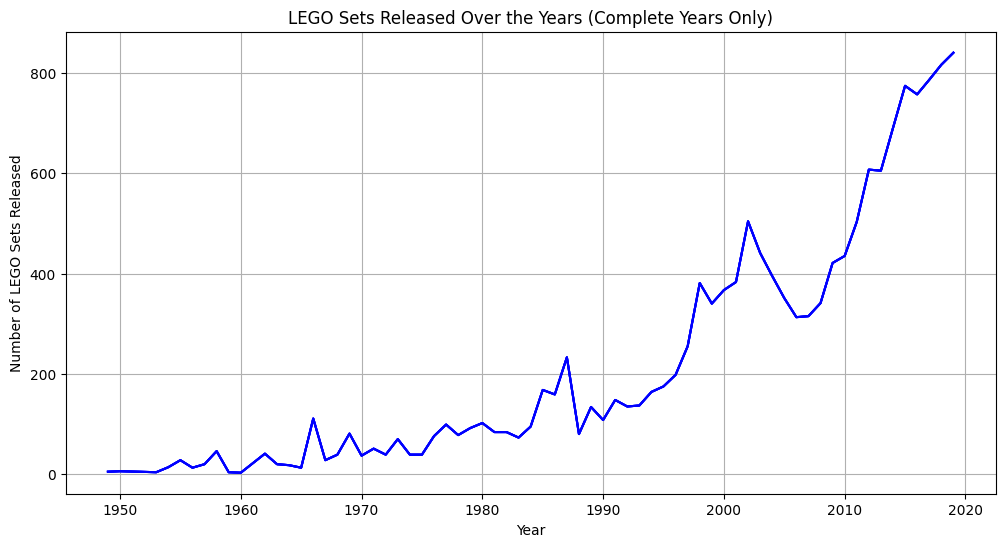

In [105]:
import matplotlib.pyplot as plt

group_counts_filtered = group_counts.iloc[:-2]

plt.figure(figsize=(12, 6))
plt.plot(
    group_counts_filtered.index,
    group_counts_filtered.values,
    linestyle='-',
    color='b'
)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of LEGO Sets Released")
plt.title("LEGO Sets Released Over the Years (Complete Years Only)")
plt.grid(True)

# Show the plot
plt.show()


### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [132]:
import pandas as pd

# Load sets.csv instead of themes.csv
df = pd.read_csv("data/sets.csv")

# remember the diffeerence between .groupby('year').count
print("Counts Total Rows per Column:\n")
print(df.groupby('year').count())

# and here ['theme_id'] is counting each unique theme_id while ('year') can be seen as index
print("Counts Unique Themes Per Year\n")
print(df.groupby('year')['theme_id'].nunique())

Counts Total Rows per Column:

      set_num  name  theme_id  num_parts
year                                    
1949        5     5         5          5
1950        6     6         6          6
1953        4     4         4          4
1954       14    14        14         14
1955       28    28        28         28
...       ...   ...       ...        ...
2017      786   786       786        786
2018      816   816       816        816
2019      840   840       840        840
2020      674   674       674        674
2021        3     3         3          3

[71 rows x 4 columns]
Counts Unique Themes Per Year

year
1949     2
1950     1
1953     2
1954     2
1955     4
        ..
2017    89
2018    93
2019    78
2020    82
2021     1
Name: theme_id, Length: 71, dtype: int64
nigga


In [130]:
# using .agg for each columns
print("Using .agg\n")
themes_by_year = df.groupby('year').agg({'theme_id': pd.Series.nunique}).rename(columns={'theme_id': 'nr_themes'})
print(themes_by_year)

Using .agg

      nr_themes
year           
1949          2
1950          1
1953          2
1954          2
1955          4
...         ...
2017         89
2018         93
2019         78
2020         82
2021          1

[71 rows x 1 columns]


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

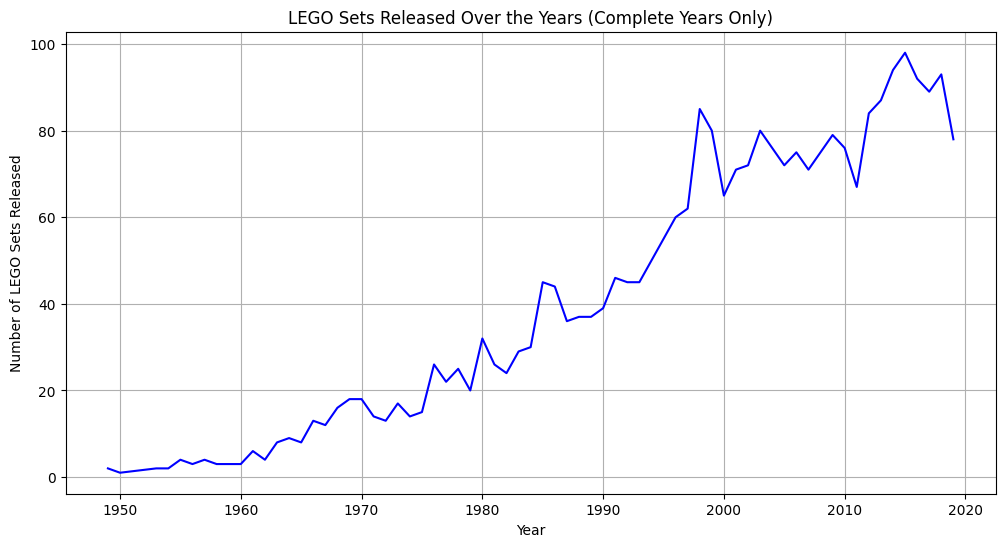

In [133]:
import matplotlib.pyplot as plt

themes_filtered = themes_by_year.iloc[:-2]

plt.figure(figsize=(12, 6))
plt.plot(
    themes_filtered.index,
    themes_filtered.values,
    linestyle='-',
    color='b'
)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of themes")
plt.title("Number of themes per year")
plt.grid(True)

# Show the plot
plt.show()

### Line Charts with Two Seperate Axes

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [143]:
# getting the average parts per set so it gives fair comparison between each year
mean_parts_num = df.groupby('year').agg({'num_parts': pd.Series.mean})
print(mean_parts_num)

print(f"YEAR 1954: {mean_parts_num.loc[1954]['num_parts']}")
print(f"YEAR 2017: {mean_parts_num.loc[2017]['num_parts']}")

       num_parts
year            
1949   99.600000
1950    1.000000
1953   13.500000
1954   12.357143
1955   36.607143
...          ...
2017  221.840967
2018  213.618873
2019  207.510714
2020  259.732938
2021    0.000000

[71 rows x 1 columns]
YEAR 1954: 12.357142857142858
YEAR 2017: 221.8409669211196


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

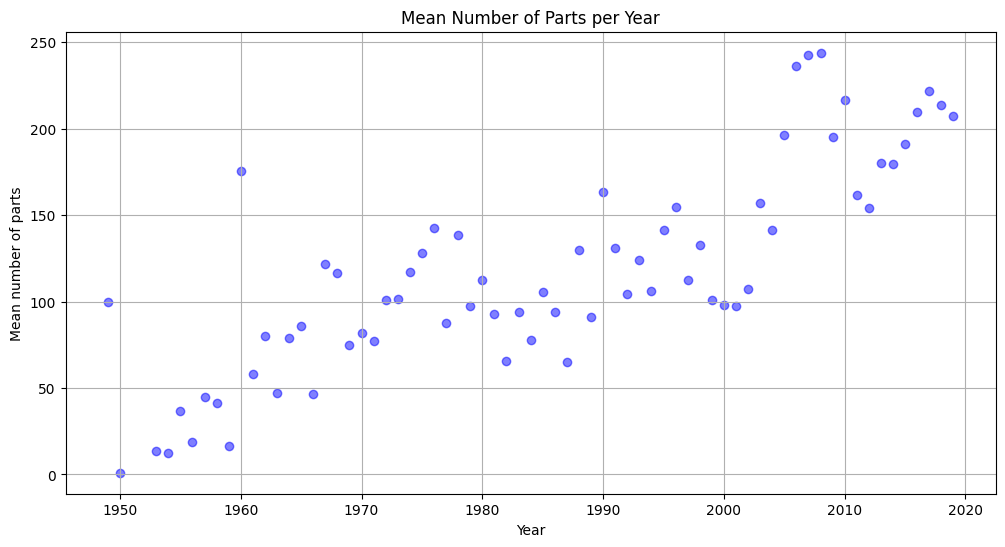

In [145]:
import matplotlib.pyplot as plt

# Exclude the last two years (assuming they are incomplete)
mean_parts_num_filtered = mean_parts_num.iloc[:-2]

plt.figure(figsize=(12, 6))
plt.scatter(
    mean_parts_num_filtered.index,
    mean_parts_num_filtered.num_parts,  # Explicitly reference the column
    color='b',
    alpha=0.5  # Optional: Makes points semi-transparent
)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Mean number of parts")
plt.title("Mean Number of Parts per Year")
plt.grid(True)

# Show the plot
plt.show()


### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [150]:
print(mean_parts_num.idxmax()[0])  # Extract the index (year) with the max value
print("----------\n")
print(mean_parts_num.loc[2020, 'num_parts'])  # Get the actual mean parts value for 2020


2020
----------

259.73293768545994


/var/folders/gb/htxs6lsn7l717xys7y7wf5l80000gn/T/ipykernel_20060/3869327692.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(mean_parts_num.idxmax()[0])  # Extract the index (year) with the max value


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [154]:
import pandas as pd

themes_df = pd.read_csv("data/themes.csv")

print(f"First 5\n{themes_df.head()}\n")
print(f"Last 5\n{themes_df.tail()}")


First 5
   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0

Last 5
      id                   name  parent_id
591  705               Iron Man      696.0
592  706             Spider-Man      696.0
593  707                  X-Men      696.0
594  708  The LEGO Batman Movie      697.0
595  709               LEGO Art        NaN
17      18
150    158
174    209
211    261
Name: id, dtype: int64


In [163]:
# add .values to exclude index
star_wars_id  = themes_df.loc[themes_df['name'] == 'Star Wars', 'id'].values
print(star_wars_id)

[ 18 158 209 261]


In [165]:
sets_df = pd.read_csv("data/sets.csv")
# sets_df['theme_id'] goes to the theme_id in sets_df and then checks 
# if start_wars_id is in theme_id and if there it filters from sets_df to create new_df
star_wars_sets = sets_df[sets_df['theme_id'].isin(star_wars_id)]
print(star_wars_sets)

           set_num                                               name  year  \
850        11912-1                Star Wars: Build Your Own Adventure  2016   
855        11920-1  Parts for Star Wars Build Your Own Adventure: ...  2019   
1717       20006-1                            Clone Turbo Tank - Mini  2008   
1728       20007-1                     Republic Attack Cruiser - Mini  2009   
1738       20009-1                                AT-TE Walker - Mini  2009   
...            ...                                                ...   ...   
15686         VP-4            Star Wars Co-Pack of 7101 7111 and 7171  2000   
15689         VP-8                 Star Wars Co-Pack of 7130 and 7150  2000   
15707      XWING-1                                Mini X-Wing Fighter  2019   
15708      XWING-2                                  X-Wing Trench Run  2019   
15709  YODACHRON-1                    Yoda Chronicles Promotional Set  2013   

       theme_id  num_parts  
850         158       

### Merging (i.e., Combining) DataFrames based on a Key


In [166]:
# Merge sets_df with themes_df using theme_id (sets_df) and id (themes_df)
# left_on and right_on matches the id
merged_df = sets_df.merge(themes_df, left_on='theme_id', right_on='id')

# Show the first few rows to verify the merge
print(merged_df.head())

  set_num                      name_x  year  theme_id  num_parts   id  \
0   001-1                       Gears  1965         1         43    1   
1  0011-2           Town Mini-Figures  1978        84         12   84   
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0  199   
3  0012-1          Space Mini-Figures  1979       143         12  143   
4  0013-1          Space Mini-Figures  1979       143         12  143   

         name_y  parent_id  
0       Technic        NaN  
1  Supplemental       67.0  
2  Lion Knights      186.0  
3  Supplemental      126.0  
4  Supplemental      126.0  


In [168]:
# Count unique themes per year
themes_per_year = merged_df.groupby('year')['theme_id'].nunique()

# Count total sets per year
sets_per_year = merged_df.groupby('year')['set_num'].count()


year
1949     2
1950     1
1953     2
1954     2
1955     4
        ..
2017    89
2018    93
2019    78
2020    82
2021     1
Name: theme_id, Length: 71, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# First y-axis (number of sets)
ax1.plot(sets_per_year.index, sets_per_year, color='b', linestyle='-', label="Number of Sets")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Sets", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for number of themes
ax2 = ax1.twinx()  # Share the same x-axis
ax2.plot(themes_per_year.index, themes_per_year, color='r', linestyle='-', label="Number of Themes")
ax2.set_ylabel("Number of Themes", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title & grid
plt.title("Number of LEGO Sets & Themes Released Per Year")
ax1.grid(True)

plt.show()
